## Example of how to control Tektronix Oscilloscope  RIGOL MSO2102A using PyVISA 

In [1]:
# test pyvisa
import pyvisa
rm = pyvisa.ResourceManager('@py')
print(rm.list_resources())
instr = rm.open_resource('TCPIP0::192.168.2.2::INSTR')
print(instr.query('*IDN?'))

('TCPIP::192.168.2.2::INSTR',)
RIGOL TECHNOLOGIES,MSO2102A,DS2F214100395,00.03.06



In [2]:
from oscrigol import *

In [3]:
MSO2102A = Oscrigol(ip_address="192.168.2.2")

In [4]:
MSO2102A.config(channels=(1,), triggerSource="CHAN1", triggerLevel=0.1, vAutoScale=True)

In [5]:
MSO2102A.initComm()
print("ID:", MSO2102A.getID())
MSO2102A.closeComm()

ID: RIGOL TECHNOLOGIES,MSO2102A,DS2F214100395,00.03.06



In [6]:
meas = MSO2102A()
print("ID:", meas)
t = meas[0]
v = meas[1]

ID: [[-0.014     -0.01398   -0.01396   ...  0.01394    0.01396    0.01398  ]
 [ 1.525614   1.4897172  1.525614  ... -1.525614  -1.4897172 -1.525614 ]]
Len tiempo 1400
Len volt 1400


In [7]:
import matplotlib.pyplot as plt

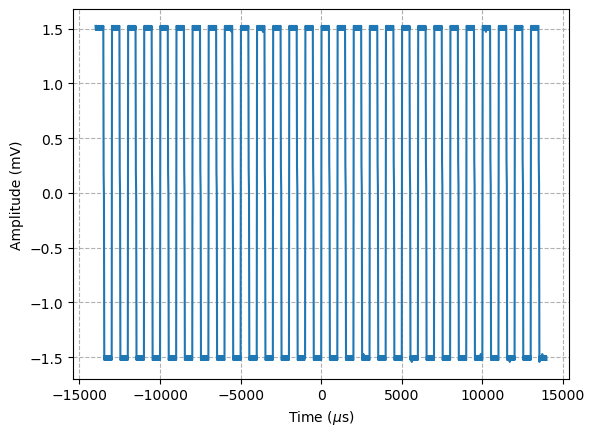

In [25]:
plt.figure()
plt.plot(t*1e6,v) # (us,V)
plt.xlabel('Time ($\mu$s)')
plt.ylabel('Amplitude (mV)')
plt.grid(linestyle = '--')

In [26]:
print("tiempo",len(t))
print("volt",len(v))

tiempo 1400
volt 1400


In [13]:
MSO2102A.config(channels = (1,),
                 triggerSource = 'EXT',
                 triggerLevel = 0.5,
                 triggerSlope = 'RISE',
                 triggerMode = 'NORM',
                 triggerCoup = 'AC',
                 acquisition = 4,
                 vAutoScale = False,
                 chanband = 'OFF',
                 chaninv = 'OFF' )

:ACQ:MDEPth? =  1400000

:WAV:POIN? =  1400000

Descargando 1,400,000 puntos del canal 1...
Ind: 0 Len: 507885 [1.525614  1.525614  1.525614  ... 1.5435624 1.525614  1.5435624]
Ind: 1 Len: 892115 [1.5435624 1.5435624 1.525614  ... 1.525614  1.5435624 1.525614 ]
Transferencia completada en 43.7 s

Memoria efectiva: 1,400,000 puntos
Canales activos: 1


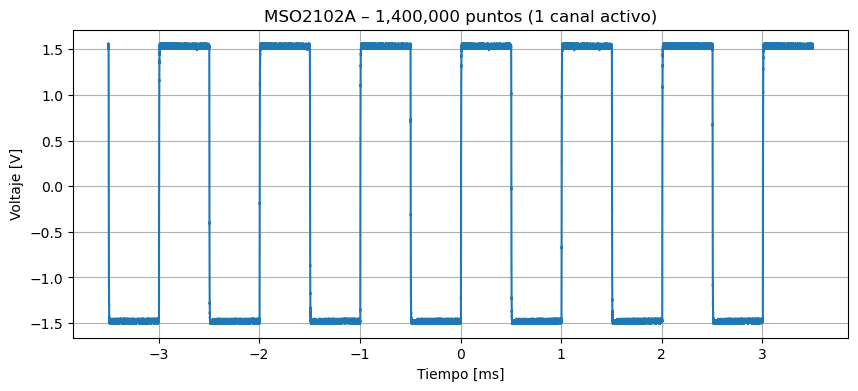

In [19]:
MSO2102A.initComm()

t, v, mem_depth, nchan = MSO2102A.download_raw_data(channel=1, points=1_400_000)

print(f"\nMemoria efectiva: {mem_depth:,} puntos")
print(f"Canales activos: {nchan}")

plt.figure(figsize=(10,4))
plt.plot(t*1e3, v)
plt.title(f"MSO2102A – {mem_depth:,} puntos ({nchan} canal activo)")
plt.xlabel("Tiempo [ms]")
plt.ylabel("Voltaje [V]")
plt.grid(True)
plt.show()

MSO2102A.closeComm()